In [6]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("pga_tour_stats_2020.csv")
df.head(10)

,PLAYER NAME,AVG_APPROACH_BIRDIE_OR_BETTER,AVG_APPROACH_BOGEY_OR_WORSE,AVG_APPROACH_PAR,AVG_APPROACH_SHOT_DISTANCE,FAIRWAY_APPROACH_RTP,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OTHER,GIR_PCT_OVERALL,...,SCORING_PAR4_AVERAGE,SCORING_PAR5_AVERAGE,SCORING_ROUNDS_IN_60S,SCORING_AVG_OVERALL,SCORING_TOTAL_BIRDIES,SCORING_TOTAL_EAGLES,STREAKS_CUTS_MADE,STREAKS_FIRS_MADE,STREAKS_GIRS_MADE,STREAKS_HOLES_UNDER_PAR
0,Zac Blair,152.9,158.9,158.5,157.5,-0.034,39.5,74.74,51.59,63.47,...,4.07,4.65,25.0,71.705,240.0,1.0,NaN,0.0,0.0,3.0
1,Jimmy Walker,156.9,166.8,160.3,161.0,-0.033,57.8,78.74,50.88,62.20,...,4.11,4.74,10.0,71.927,159.0,4.0,NaN,3.0,0.0,3.0
2,Cameron Percy,161.3,164.0,161.6,161.9,-0.104,58.1,79.36,58.75,69.63,...,3.98,4.62,17.0,71.073,160.0,6.0,NaN,3.0,7.0,3.0
3,Sebastian Cappelen,161.7,161.1,153.6,156.4,-0.065,43.2,77.04,54.97,64.36,...,4.04,4.73,12.0,72.106,186.0,5.0,NaN,0.0,0.0,5.0
4,Brian Gay,162.3,159.8,156.1,158.0,-0.065,49.1,76.60,54.40,64.81,...,4.01,4.72,24.0,71.407,245.0,5.0,NaN,0.0,1.0,5.0
5,"Ted Potter, Jr.",162.7,166.2,156.2,159.2,-0.056,58.3,76.41,58.68,68.94,...,4.02,4.74,14.0,71.877,152.0,3.0,NaN,8.0,0.0,3.0
6,Arjun Atwal,162.9,163.0,156.3,158.7,-0.022,45.5,73.96,57.24,66.49,...,4.01,4.68,12.0,71.867,107.0,5.0,NaN,0.0,7.0,3.0
7,Vaughn Taylor,163.0,167.7,160.3,162.1,-0.076,41.9,71.35,51.65,63.75,...,4.02,4.72,26.0,70.827,237.0,3.0,NaN,4.0,1.0,5.0
8,Jason Dufner,164.2,161.4,162.8,162.9,-0.046,39.5,77.43,51.89,67.83,...,4.04,4.71,22.0,71.159,202.0,5.0,NaN,0.0,0.0,3.0
9,Roger Sloan,164.2,164.2,156.2,159.0,-0.068,56.3,75.48,53.69,65.58,...,4.03,4.64,17.0,71.586,174.0,7.0,2.0,0.0,0.0,4.0


In [ ]:
##Show specific columns in relation to driving, putting, top 10 finishes and money earned
print(df[['PLAYER NAME','FINISHES_TOP10','FINISHES_OFFICIAL_MONEY','TEE_AVG_DRIVING_DISTANCE','PUTTING_AVG_OVERALL']])

array([[<AxesSubplot:title={'center':'FINISHES_TOP10'}>,
        <AxesSubplot:title={'center':'TEE_AVG_DRIVING_DISTANCE'}>],
       [<AxesSubplot:title={'center':'PUTTING_AVG_OVERALL'}>,
        <AxesSubplot:>]], dtype=object)

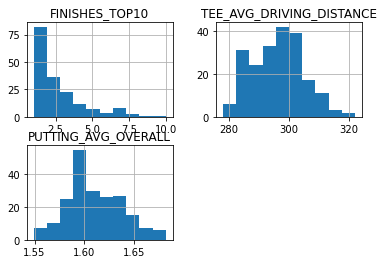

In [28]:
##Create potential visualizations 

df.hist(['FINISHES_TOP10','FINISHES_OFFICIAL_MONEY','TEE_AVG_DRIVING_DISTANCE','PUTTING_AVG_OVERALL'])

In [29]:
##show averages for 4 main topics withholding FINISHES_OFFICIAL_MONEY as we do not care about that yet
df['FINISHES_TOP10'].mean()

2.4237288135593222

In [33]:
df['TEE_AVG_DRIVING_DISTANCE'].mean()

296.3687500000001

In [34]:
df['PUTTING_AVG_OVERALL'].mean()

1.6105865384615377

In [53]:
##show top 20 players with the most top 10 finishes
df['PLAYER NAME'] = df['FINISHES_TOP10'].rank(ascending=False)
df.head()

,PLAYER NAME,AVG_APPROACH_BIRDIE_OR_BETTER,AVG_APPROACH_BOGEY_OR_WORSE,AVG_APPROACH_PAR,AVG_APPROACH_SHOT_DISTANCE,FAIRWAY_APPROACH_RTP,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OTHER,GIR_PCT_OVERALL,...,SCORING_PAR4_AVERAGE,SCORING_PAR5_AVERAGE,SCORING_ROUNDS_IN_60S,SCORING_AVG_OVERALL,SCORING_TOTAL_BIRDIES,SCORING_TOTAL_EAGLES,STREAKS_CUTS_MADE,STREAKS_FIRS_MADE,STREAKS_GIRS_MADE,STREAKS_HOLES_UNDER_PAR
0,336.0,152.9,158.9,158.5,157.5,-0.034,39.5,74.74,51.59,63.47,...,4.07,4.65,25.0,71.705,240.0,1.0,NaN,0.0,0.0,3.0
1,143.0,156.9,166.8,160.3,161.0,-0.033,57.8,78.74,50.88,62.20,...,4.11,4.74,10.0,71.927,159.0,4.0,NaN,3.0,0.0,3.0
2,56.0,161.3,164.0,161.6,161.9,-0.104,58.1,79.36,58.75,69.63,...,3.98,4.62,17.0,71.073,160.0,6.0,NaN,3.0,7.0,3.0
3,281.0,161.7,161.1,153.6,156.4,-0.065,43.2,77.04,54.97,64.36,...,4.04,4.73,12.0,72.106,186.0,5.0,NaN,0.0,0.0,5.0
4,41.0,162.3,159.8,156.1,158.0,-0.065,49.1,76.60,54.40,64.81,...,4.01,4.72,24.0,71.407,245.0,5.0,NaN,0.0,1.0,5.0
